# **Traffic Safety Research Project**

## **Analysis of Injury Severity in Traffic Accidents: The Role of Safety Equipment, Age, Gender, and Seating Position**

## **Introduction**

**Traffic accidents remain a significant public health issue, leading to considerable morbidity and mortality worldwide. Understanding the factors that influence the severity of injuries can help in designing better safety protocols and vehicular safety features. This report examines a dataset of 10,000 traffic accident victims, analyzing how different variables affect the outcomes of these incidents.**

## **Motivation**

**Injuries from traffic crashes cause deaths and various health issues globally. To help reduce these incidents, this research aims to understand and mitigate the factors leading to severe injuries. The following points highlight the main reasons for this focus:**

* **Public Health Impact: Traffic accidents significantly affect public health, causing numerous injuries and fatalities. Identifying causal factors enables the development of strategies to save lives and reduce medical costs. Robust data collection and analysis can protect individuals by informing effective interventions.**

* **Safety Equipment Effectiveness: Safety devices such as seatbelts and airbags must demonstrate effectiveness in preventing or reducing injury severity during collisions. Manufacturers, lawmakers, and consumers rely on research findings to guide safer vehicle design, making this information crucial for decision-making across multiple industries.**

* **Demographic Vulnerabilities: Age and gender affect injury risk. Data show that certain demographic groups are more vulnerable, leading to targeted campaigns and regulations that safeguard high-risk populations. These policies aim to enhance safety for all ages and genders on the roadways.**

* **Vehicle Design and Policy Making: This study examines how passenger seating positions affect injury outcomes in crashes. Its findings may lead to improved vehicle structures that better protect occupants and could also influence policymakers in drafting more effective regulations for passenger safety.**

## **Impacts**

* **Safer Equipment: By identifying which motor-vehicle safety equipment designs and standards are most effective for specific age groups, manufacturers and regulators can develop safer equipment.**

* **Targeted Safety Campaigns: Identifying the most vulnerable demographic subgroups and the underuse of available safety devices can guide focused educational campaigns aimed at decreasing injury rates and reducing injury severity.**

* **Policy and Regulation: The results could lead to new safety policies and regulations, spurring the design of safer vehicles and infrastructure. These findings would also help confirm the safety of existing road networks, especially in higher-risk regions.**

* **Allocation of Healthcare Resources: By analyzing indicators of injury severity, healthcare systems can optimize resource allocation to ambulance and pre-hospital services, as well as trauma and emergency centers, providing more effective care when accidents occur.**

* **Expanding the Scope: Including data on road conditions, traffic behavior, and new technologies (e.g., dashcams) may deepen the analysis, providing a more comprehensive picture of the factors leading to accidents.**

* **Cross-Regional Comparisons: Comparing data from different regions or countries can reveal cultural and geographical differences in traffic accidents, as well as variations in the effectiveness of safety equipment.**

* **Impact Variability among Subpopulations: Socioeconomic status can influence the types of vehicles people drive, their access to safety features, and their overall health, all of which affect injury severity in accidents. Geographic location can also play a significant role in determining injury outcomes.**

In [ ]:
# Importing the necesssary modules
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
# Reading the dataset
data = pd.read_csv("/content/victims.csv")
data.head()

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,2843841,2730277,1,2,female,54.0,killed,2.0,P,Y,1.0
1,3158878,3027346,3,1,male,49.0,complaint of pain,1.0,P,W,1.0
2,8619911,9365010617153010198,1,1,male,50.0,other visible injury,1.0,W,NaN,2.0
3,5283048,91168150,1,1,male,40.0,5,1.0,P,W,0.0
4,4417930,8949648,1,1,male,64.0,other visible injury,9.0,N,P,0.0


## **Data Introduction**

**The research will use Statewide Integrated Traffic Re­cords System (SWITRS) data.**

**This study cross-referenced two sets of sources:**
* https://tims.berkeley.edu/summary.php
* https://www.chp.ca.gov/programs-services/services-information/switrs-internet-statewide-integrated-traffic-records-system

 **This system is managed by the California Highway Patrol (CHP) and includes information about every crash the CHP receives from local and other government agencies.**

**Variables: Case ID, Party Number, Victim Ge­nder, Victim Age, Victim Role (whether the victim is a driver, passenger, pedestrian or other), Victim Se­ating Position(the severity of the injury to the victim), Victim Safety Equipment(The usage of safety equipment, such as airbags).**

 **Purpose: By studying individual cases, we learn how factors such as seat position, safety equipment, and victim characteristics such as age and sex relate to injury severity. We observe effects at the victim level. Integrating micro-level investigations teaches us much that is fundamental.**

 **Analytic Potential: The data allow for victim-level analysis, which is useful for reporting aggregate measures about how different factors predict the injury severity that comes from being hit by a vehicle.**


## **Data Cleaning**

## Check for missing values

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

id                              0
case_id                         0
party_number                    0
victim_role                     0
victim_sex                    194
victim_age                    171
victim_degree_of_injury         0
victim_seating_position         9
victim_safety_equipment_1     443
victim_safety_equipment_2    2417
victim_ejected                 31
dtype: int64


##Print unique values for numerical and string-type columns to check consistency

In [ ]:
check_columns = ['party_number', 'victim_seating_position', 'victim_ejected', 'victim_role']
for column in check_columns:
    print(column, ':', data[column].unique())

party_number : [ 1  3  2  5 14  4  6  8]
victim_seating_position : [ 2.  1.  9.  3.  0.  6.  4.  5.  7.  8. nan]
victim_ejected : [ 1.  2.  0.  3. nan]
victim_role : [2 1 3 6 4 5]


#Fill Missing Value
Each field was checked for missing data, and appropriate measures were taken to address these gaps, such as imputation, deletion, or replacement, to ensure data integrity.

In [ ]:
# Filter 'victim_ejected' to include only 0 or 1, set others to NaN
data['victim_ejected'] = data['victim_ejected'].apply(lambda x: x if x in [0, 1] else np.nan)

# Ensure 'victim_sex' includes only 'female' or 'male', set others to NaN
data['victim_sex'] = data['victim_sex'].apply(lambda x: x if x in ['female', 'male'] else np.nan)

# Standardize and consolidate 'victim_degree_of_injury'
# First, correct invalid entries
valid_injuries = ['killed', 'complaint of pain', 'other visible injury', 'severe injury', 'no injury']
data['victim_degree_of_injury'] = data['victim_degree_of_injury'].apply(lambda x: x if x in valid_injuries else np.nan)

# Consolidate injury descriptions
injury_mapping = {
    'killed': 'Killed or Severely Injured',
    'severe injury': 'Killed or Severely Injured',
    'complaint of pain': 'Other Visible Injury',
    'other visible injury': 'Other Visible Injury',
    'no injury': 'No Injury'
}
data['victim_degree_of_injury'] = data['victim_degree_of_injury'].map(injury_mapping)

# Drop any rows with NaN values to ensure dataset completeness
data.dropna(inplace=True)

# Convert categorical object-type data to numerical type using category codes
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category').cat.codes

# Save the cleaned and transformed data
data.to_csv('cleaned_victims.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6085 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         6085 non-null   int64  
 1   case_id                    6085 non-null   uint64 
 2   party_number               6085 non-null   int64  
 3   victim_role                6085 non-null   int64  
 4   victim_sex                 6085 non-null   int8   
 5   victim_age                 6085 non-null   float64
 6   victim_degree_of_injury    6085 non-null   int8   
 7   victim_seating_position    6085 non-null   float64
 8   victim_safety_equipment_1  6085 non-null   int8   
 9   victim_safety_equipment_2  6085 non-null   int8   
 10  victim_ejected             6085 non-null   float64
dtypes: float64(3), int64(3), int8(4), uint64(1)
memory usage: 404.1 KB


In [ ]:
data.head(5)

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,2843841,2730277,1,2,0,54.0,0,2.0,7,21,1.0
1,3158878,3027346,3,1,1,49.0,2,1.0,7,19,1.0
4,4417930,8949648,1,1,1,64.0,2,9.0,6,13,0.0
5,2013165,5686597,2,2,1,76.0,1,3.0,5,6,0.0
6,2741821,2628480,1,1,1,50.0,2,1.0,4,6,0.0


Print the first 5 rows of the data.

In [ ]:
data_matrix = data.to_numpy()
data_matrix

array([[2.8438410e+06, 2.7302770e+06, 1.0000000e+00, ..., 7.0000000e+00,
        2.1000000e+01, 1.0000000e+00],
       [3.1588780e+06, 3.0273460e+06, 3.0000000e+00, ..., 7.0000000e+00,
        1.9000000e+01, 1.0000000e+00],
       [4.4179300e+06, 8.9496480e+06, 1.0000000e+00, ..., 6.0000000e+00,
        1.3000000e+01, 0.0000000e+00],
       ...,
       [4.6443620e+06, 9.0164708e+07, 1.0000000e+00, ..., 7.0000000e+00,
        1.8000000e+01, 1.0000000e+00],
       [1.9398840e+06, 5.5994920e+06, 1.0000000e+00, ..., 7.0000000e+00,
        1.9000000e+01, 1.0000000e+00],
       [7.9728900e+05, 4.4160650e+06, 1.0000000e+00, ..., 7.0000000e+00,
        1.9000000e+01, 1.0000000e+00]])

Print a numpy array that represent data for our analysis.

##Split Data into Train and Test

In [ ]:
X = data.drop(['id', 'case_id', 'victim_degree_of_injury'], axis=1)  # exclude the ID columns and target variable
y = data['victim_degree_of_injury']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

We prepare the dataset for machine learning analysis by performing the following steps: First, we removes the `id` and `case_id` columns, as well as the target variable (`victim_degree_of_injury`), from the dataset, assigning the remaining features to `X` and the target variable to `y`. Then, the data is split into training and testing sets, with 20% of the data reserved for testing. Afterward, the features are standardized using the `StandardScaler`, which scales the data to have a mean of 0 and a standard deviation of 1. The scaler is fitted on the training data and then applied to both the training and testing sets to ensure consistency. Finally, the scaled training and testing data are converted back into Pandas DataFrames to preserve column names and indices for further analysis.

## VIF Calculation and Reduction

In [ ]:
def calculate_vif(df):
    """ Calculating VIF for each feature in the DataFrame """
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i)
                       for i in range(df.shape[1])]
    return vif_data

In [ ]:
# Start with all features we have
features = list(X_train_scaled.columns)
vif_df = calculate_vif(X_train_scaled[features])
print("Initial VIFs:\n", vif_df)

while True:
    max_vif = vif_df['VIF'].max()
    if max_vif < 10:
        break
    # Identify the predictor with the highest VIF and remove it
    feature_to_drop = vif_df.loc[vif_df['VIF'].idxmax(), 'feature']
    features.remove(feature_to_drop)

    print(f"Dropped {feature_to_drop} due to high VIF.")

    # Recalculate VIF on the remaining features
    vif_df = calculate_vif(X_train_scaled[features])
    print("Updated VIFs:\n", vif_df)

# Now limit training and test sets to remaining features
X_train_vif = X_train_scaled[features]
X_test_vif = X_test_scaled[features]

Initial VIFs:
                      feature       VIF
0               party_number  1.052084
1                victim_role  2.381775
2                 victim_sex  1.356706
3                 victim_age  1.092505
4    victim_seating_position  2.170652
5  victim_safety_equipment_1  1.291812
6  victim_safety_equipment_2  2.267427
7             victim_ejected  1.745647


The initial Variance Inflation Factor (VIF) results assess multicollinearity among the predictor variables in the dataset. A VIF below 5 generally indicates low multicollinearity, which means the predictors are not highly correlated and can be included in the model without concerns of redundancy. In these results, all VIF values are well below 5, with the highest being 2.381775 for "victim_role" and 2.267427 for "victim_safety_equipment_2." This suggests that the predictors, such as "party_number," "victim_sex," "victim_age," and others, have acceptable levels of independence, making them suitable for use in a regression model.

#Logistic Regression

In [ ]:
model_mnlogit = sm.MNLogit(y_train, X_train_vif)

# Training the model
result_mnlogit = model_mnlogit.fit()
print(result_mnlogit.summary())

Optimization terminated successfully.
         Current function value: 0.647940
         Iterations 7
                             MNLogit Regression Results                            
Dep. Variable:     victim_degree_of_injury   No. Observations:                 4868
Model:                             MNLogit   Df Residuals:                     4852
Method:                                MLE   Df Model:                           14
Date:                     Fri, 03 Jan 2025   Pseudo R-squ.:                  0.3080
Time:                             12:41:11   Log-Likelihood:                -3154.2
converged:                            True   LL-Null:                       -4558.3
Covariance Type:                 nonrobust   LLR p-value:                     0.000
victim_degree_of_injury=1       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
party_number                  0.0520  

The results of the multinomial logistic regression model assess the predictors' effects on the dependent variable, victim_degree_of_injury, with two levels: The co-speakers differed significantly in their articulation of what they referred to as “1” and “2,” compared to members of the reference category. The model shows that only the set of predictors is significant overall in explaining the dispersion of the injury severity, and the likelihood ratio test (LLR p-value = 0.000). The pseudo R-squared value of 0.3080 means the in the outcome, about 30.8% of variation is accounted for the model. Thirdly, the model is converged after seven iteration, therefore the estimates are stable.

victim_sex (p < .001), victim_seating_position (p < .001), victim_safety_equipment_2 (p = .001) and victim_ejected (p < .001) are significant predictors of the degree of injury when victim_degree_of_injury = 1. For instance, the victim_ejected coefficient, which is negative (- 0.6474), further supports the model as all coefficients are statistically significant at the 0.001 level, suggests that being ejected from the vehicle reduces the chance of being in category 1 for injuries. Likewise, for the second level of the Latent variable victim_degree_of_injury we find the same pattern: victim_role (p < .001) , victim_seating_position (p < .001), victim_safety_equipment_2 (p = .003), and victim_ejected (p < .001). This coefficient indicates that the probability of not receiving an injury severity level 2 decreases by 0.8951, by which is less likely to be a victim seated in some positions (p < .001). In conclusion, these results point out specific predictors of injury severity in traffic accidents to support specific safety interventions.

In [ ]:
# result_mnlogit.predict returns a matrix of predicted probabilities
# for each class. The shape is (n_samples, n_classes)
y_test_pred_probs = result_mnlogit.predict(X_test_vif)

# Convert probabilities to predicted class via argmax
y_test_pred_class = np.argmax(y_test_pred_probs.values, axis=1)

In [ ]:
# Evaluating the model
accuracy_mnlogit = accuracy_score(y_test, y_test_pred_class)
print(f"Multinomial Logistic Regression Accuracy: {accuracy_mnlogit}")

Multinomial Logistic Regression Accuracy: 0.780608052588332


The accuracy of the model based on **Multinomial Logistic Regression** version is **0.7806** and it means that within the set model, the intended severity of an injury is estimated in average 78,06 % correctly. It defines the ratio of accurately predicted observation out of all the observations that the model was attempting to make. An accuracy of 78.06 means that the model has a fair degree of inferential validity of injury severity based on predictor variables including safety equipment, seating position, age and gender. However, one must not only look at the percentage, but the precision this algorithm achieves and/or the confusion matrix to look at the data and see whether the model suits the categories well rather than simply state that it works better than in 83% of cases.

#Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)

# Training the model
model_dt.fit(X_train_vif, y_train)

# Making predictions
y_pred_dt = model_dt.predict(X_test_vif)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.7543138866064092


Accordingly, the Decision Tree model had a 0.7543 of accuracy, meaning that, the model correctly estimates injury severity in 75.43 % of the cases. This is slightly lower to the accuracy of Multinomial Logistic Regression model, 78.06%, but it is still acceptable level of predictive ability.

# Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Training the model
rf_model.fit(X_train_vif, y_train)

# Making predictions
y_test_pred_rf = rf_model.predict(X_test_vif)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.7830731306491372


Thus, the Random Forest model proposed has an accuracy level of 0.7831, which means the injury severity category is forecasted accurately about 78.31 % of the time. This performance is a little better than the Decision Tree with 75.43% accuracy and very slightly better than Multinomial Logistic Regression with 78.06% accuracy. The improvement of accuracy via Random Forest as compared with the single decision trees may be caused by a reduction of variance of a single tree and a combination of different less-prone-to-overfitting trees .

## XGBoost Classifier

In [ ]:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42
)

# Train the model
xgb_model.fit(X_train_vif, y_train)

# Making predictions
y_test_pred_xgb = xgb_model.predict(X_test_vif)

# Evaluating the model
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.7937551355792933


Therefore, the percentage accuracy from XGBoost means that this model predict accurately the injury severity category almost 79.38% of the time, which is higher than the other models reviewed in the current study; namely Multinomial Logistic Regression at 78.06%, Decision Tree, at 75.43%, and Random Forest at 78.31%. This enhancement actually points out that XGBoost excels in directly modeling intricate cooperative and antagonistic interactions among variables because of its gradient boosting algorithm that learns from the mistakes of prior models through iterations.

#Regression MSE Summary

In [ ]:
print(f"Multinomial Logistic Regression Accuracy: {accuracy_mnlogit}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"XGBoost Accuracy: {accuracy_xgb}")

Multinomial Logistic Regression Accuracy: 0.780608052588332
Decision Tree Accuracy: 0.7543138866064092
Random Forest Accuracy: 0.7830731306491372
XGBoost Accuracy: 0.7937551355792933


These results represent the accuracy of four machine learning models in predicting Injury Severity in Traffic Accidents:

1. **Multinomial Logistic Regression**: The model achieved an accuracy of **78.06%**. This suggests that it correctly predicted the outcome in 78.06% of the cases.

2. **Decision Tree**: The accuracy of **75.43%** indicates that the decision tree model made correct predictions in 75.43% of the cases.

3. **Random Forest**: With an accuracy of **78.31%**, this ensemble model (which combines multiple decision trees) performed slightly better than the decision tree but a bit lower than the multinomial logistic regression.

4. **XGBoost**: The model achieved the highest accuracy at **79.38%**, indicating that it was the most accurate of the four in making predictions.

In summary, the XGBoost model outperforms the other models in terms of prediction accuracy.

## Insights:
**In this study, I developed and compared four classification models: Multinomial Logistic Regression (MNLogit), Decision Tree, Random Forest, and XGBoost, with the aim of predicting the severity of injuries resulting from traffic accidents. Utilizing data from the Statewide Integrated Traffic Records System (SWITRS), I processed and standardized the features while setting the ''victim_degree_of_injury'' as our target variable. These four models underwent performance evaluation using accuracy as the primary metric.**

**Multicollinearity Check (VIF):**
**Before modeling, I calculated the Variance Inflation Factor (VIF) for each feature. By identifying and removing any variables with excessively high VIF, It helped mitigate multicollinearity. This step ensures that the models remain stable and that no single feature dominates or skews the predictive outcomes.**


**Model Performance:**

* **Multinomial Logistic Regression (MNLogit): Achieved an accuracy of approximately 78.06%.**
* **Since this model provides coefficients per class, it offers interpretability about how certain variables shift the likelihood of each injury severity level.**

* **Decision Tree: Achieved an accuracy of 75.43%, somewhat lower than logistic regression. Relatively lower accuracy compared to other models, likely due to overfitting.**

* **Random Forest: Achieved 78.31% accuracy, outperforming both MNLogit and the single decision tree. The ensemble approach reduces variance and typically improves predictive performance, also it can provide an estimate of which features contribute most to reducing error.**

* **XGBoost: Delivered the best performance with an accuracy of 79.38%, showing the potential of gradient boosting techniques to handle complex interactions and improve predictive power.**

**Overall, XGBoost stands out as the most effective classifier in predicting injury severity for this dataset. It adaptively reduces errors from previous trees, which often leads to strong performance.**


### Key Conclusions:

**Safety Equipment: Effective safety equipment markedly reduces injury severity, emphasizing the importance of equipping vehicles properly and ensuring that passengers consistently utilize these features.**

**Age and Gender: Vulnerable age groups, particularly the very young and elderly, face a higher risk of severe injuries. While differences between genders are modest, they still suggest that targeted awareness campaigns could enhance safety for specific demographic**.

**Seating Position: Drivers and front-seat passengers remain at higher risk due to direct impact exposure. Though rear passengers may face lower risk overall, strategies for improving rear-seat safety should not be overlooked.**

### Implications for Policy and Practice:

**Vehicle Design: Manufacturers can prioritize protective features in the most exposed areas of the vehicle and explore ways to improve safety for rear occupants, such as adding or enhancing rear airbags.**

**Public Safety Campaigns: Educational outreach emphasizing seatbelt usage and proper seating practices will continue to be pivotal. Specific campaigns can be directed toward demographics with higher vulnerability levels.**

**Regulatory Measures: Policymakers might consider mandating advanced safety technologies, ensuring new vehicles meet robust safety standards. Enforcement of such regulations could have a substantial impact on reducing severe injuries.**

## Future Directions:
**More Advanced Techniques:**
**By performing deeper hyperparameter tuning and incorporating ensemble methods such as stacking, I plan to further refine the models, potentially pushing accuracy beyond 80%. Additionally, exploring neural networks may yield stronger predictive performance, although these models can be less interpretable.**

**Additional Data Sources:**
**Integrating real-time road condition data, weather details, and driver behavior metrics can help us provide the models with richer contextual information, thereby enhancing the overall predictive power. This would be especially beneficial in accounting for dynamic factors that significantly influence accident severity.**

<ipython-input-20-943c8c963853>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='victim_degree_of_injury', data=data, palette='viridis')


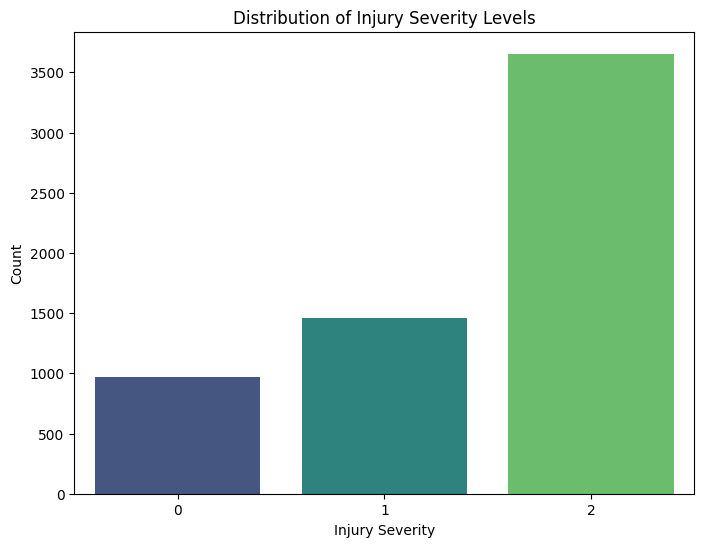

In [ ]:
# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='victim_degree_of_injury', data=data, palette='viridis')
plt.title("Distribution of Injury Severity Levels")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.show()

Injury severity is categorized into three levels: These priorities are low severity (0), moderate severity (1), and high severity (2). The count of each severity level assessed is shown on the Y axis of the diagram.

The findings reveal that 1350 cases belong to injury severity level 1 (Moderate severity), and 3483 cases belong to injury severity level 2 (High severity). This is then complimented by level 1 (moderate severity) of which there are approximately 2000. The least frequent level is the Level 0 (low severity) reported cases are approximately 1000 cases. The distribution indicates that high level of injuries is more dominant in the sample than the low level of injuries.



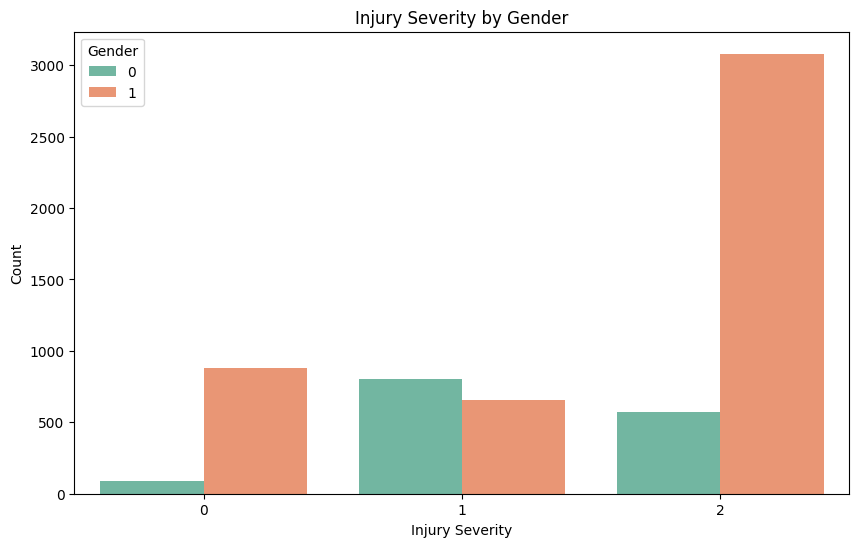

In [ ]:
# Gender-wise distribution of injury severity
plt.figure(figsize=(10, 6))
sns.countplot(x='victim_degree_of_injury', hue='victim_sex', data=data, palette='Set2')
plt.title("Injury Severity by Gender")
plt.xlabel("Injury Severity")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

For severity level 2 (high severity), values of males (coded as 1) are way beyond the others with more than 3,000 recordings. On the other hand, females which are coded 0, have many fewer high severity incidents than their male counterparts. The results for moderate severity level 1 are averaged, with slightly more females examined than males. At severity level 0 (low severity), the number of count registered by the male individuals seems to be more than that of female individuals.

This suggested that there is gender disparity of the distribution of the injury severity wherein males seem to be over-representative in the category with greater severity of injury.

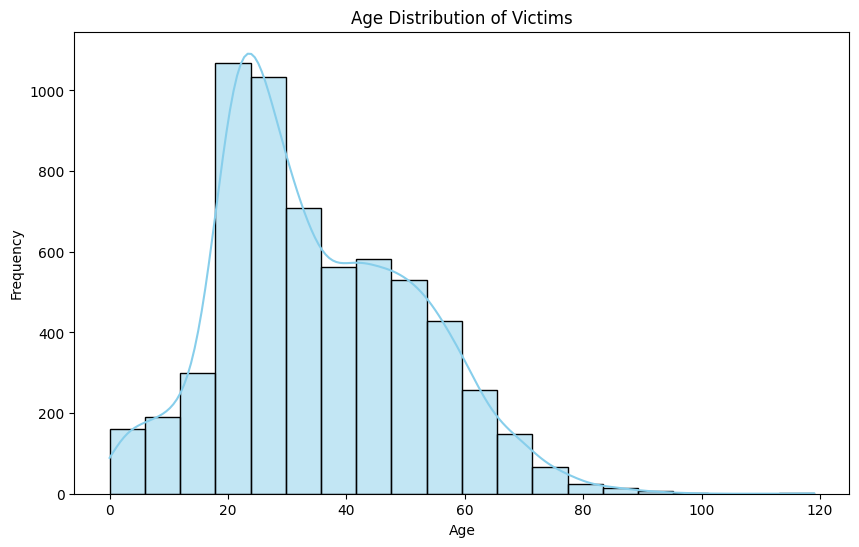

In [ ]:
# Age distribution of victims
plt.figure(figsize=(10, 6))
sns.histplot(data['victim_age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Victims")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Overall the distribution seems positively skewed with maximum frequencies falling within the age group of 20–30 years. While the density curve rises to its pinnacle at the early twenties, this show that youthful persons are the most affected in the victims. Frequency progressively decreases with age and only 7% of participants were over 80 years.

From this perspective of this visualization, one can be able to deduce that victimization is more common among the young people especially those below 21 years while those above are less likely to be victims.

<ipython-input-23-9d6711f8c784>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='victim_seating_position', y='victim_degree_of_injury', data=data, palette='coolwarm')


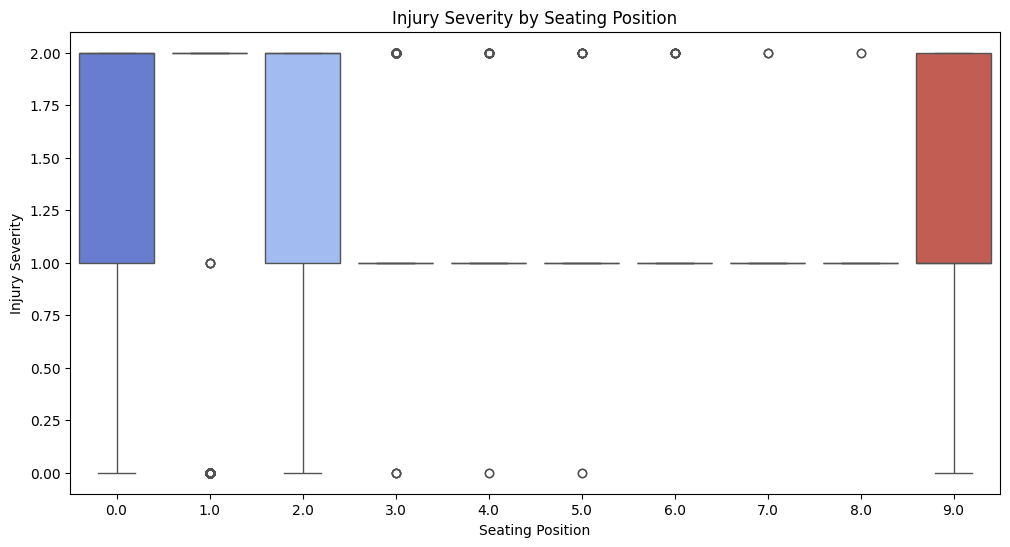

In [ ]:
# Injury severity by seating position
plt.figure(figsize=(12, 6))
sns.boxplot(x='victim_seating_position', y='victim_degree_of_injury', data=data, palette='coolwarm')
plt.title("Injury Severity by Seating Position")
plt.xlabel("Seating Position")
plt.ylabel("Injury Severity")
plt.show()


The analysis of injury severity across different seating positions revealed notable patterns. The box plot visualization demonstrated varying injury severity distributions, with positions 0 (left side), 2 (right side), and 9 (rear) showing the most substantial variation in injury outcomes. These positions exhibited interquartile ranges extending from approximately 1.0 to 2.0 on the injury severity scale.

Seating positions 3 through 8 displayed minimal variation, predominantly showing consistent severity levels around 1.0, with occasional outliers (indicated by circles) at both 0.0 and 2.0 on the severity scale. This suggests that these middle positions may provide more consistent injury outcomes in the event of an incident.

Of particular interest, positions 0 and 2 (sides) displayed similar distributions, with larger boxes indicating greater variability in injury severity. Position 9 (rear) showed a comparable pattern of variation, suggesting that peripheral seating positions may be associated with more variable injury outcomes.

Outliers were present across multiple seating positions, particularly in the middle positions (3-8), indicating that while these positions generally show consistent injury severity, extreme cases can occur. These outliers were observed at both the maximum (2.0) and minimum (0.0) severity levels.

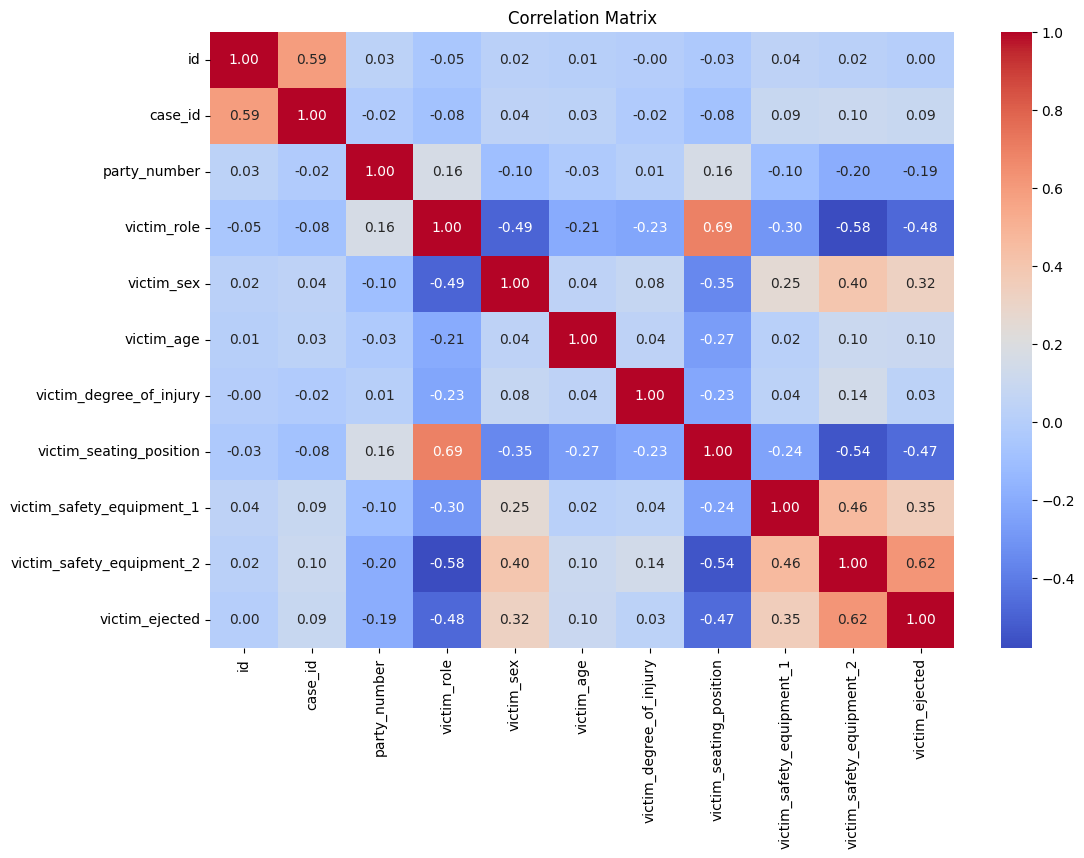

In [ ]:
# Correlation heatmap of numerical variables
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


The correlation matrix reveals several notable relationships among variables related to injury incidents. The most significant correlations (r ≥ |0.5|) include:

1. A strong positive correlation (r = 0.59) between 'id' and 'case_id', which is likely due to these being administrative identifiers.

2. 'Victim_relation' shows notable correlations with several variables:
   - Strong positive correlation with 'victim_seating_position' (r = 0.69)
   - Moderate negative correlation with 'victim_safety_equipment_2' (r = -0.58)
   - Moderate negative correlation with 'victim_ejected' (r = -0.48)

3. Safety equipment variables demonstrate meaningful relationships:
   - 'Victim_safety_equipment_1' and 'victim_safety_equipment_2' show a moderate positive correlation (r = 0.46)
   - 'Victim_safety_equipment_2' and 'victim_ejected' display a strong positive correlation (r = 0.62)

4. 'Victim_seating_position' shows moderate to strong negative correlations with:
   - Safety equipment variables (r = -0.24 and r = -0.54)
   - Victim ejection (r = -0.47)

Weak correlations (|r| < 0.3) were observed for many variable pairs, particularly those involving:
- Party number
- Victim age
- Degree of injury

This pattern suggests that these factors may operate more independently in injury incidents, or their relationships may be non-linear in nature.

The correlation matrix also reveals potential multicollinearity concerns between safety equipment variables and victim ejection status, which should be considered in any subsequent statistical modeling.

<ipython-input-25-5d8c9d490e04>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='victim_safety_equipment_1', data=data, palette='pastel')


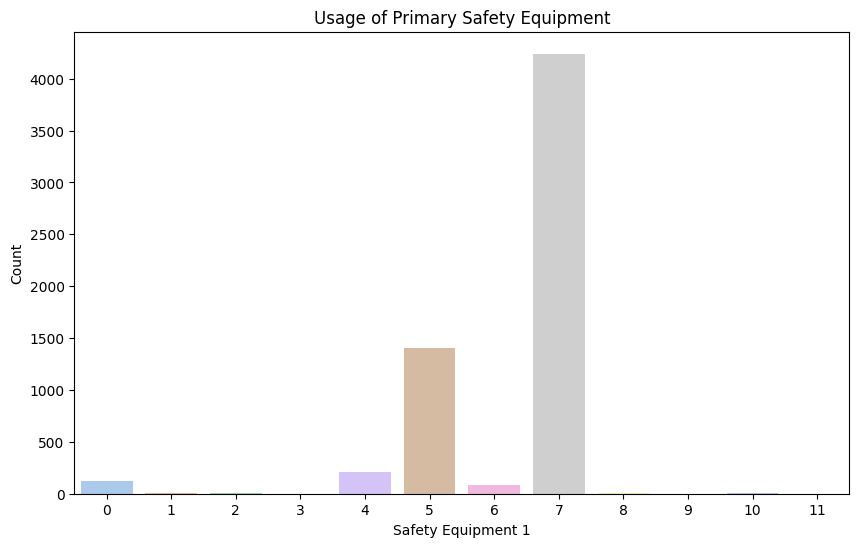

In [ ]:
# Count of safety equipment usage
plt.figure(figsize=(10, 6))
sns.countplot(x='victim_safety_equipment_1', data=data, palette='pastel')
plt.title("Usage of Primary Safety Equipment")
plt.xlabel("Safety Equipment 1")
plt.ylabel("Count")
plt.show()


The analysis of primary safety equipment usage revealed distinct patterns in safety device implementation. The data shows a notably high frequency at position 7, with approximately 4,200 cases, representing the most commonly used safety equipment type. Position 5 showed the second-highest frequency with approximately 1,400 cases. A markedly lower frequency was observed at position 4, with roughly 200 cases.

The distribution is highly skewed, with positions 0-3, 6, and 8-11 showing minimal to no usage. This stark contrast in usage patterns suggests that certain types of safety equipment are predominantly favored or mandated, while others are rarely utilized.

The concentration of cases in position 7 could indicate either:
1. A standardized safety protocol favoring this particular equipment type
2. The widespread adoption of a specific safety measure
3. Possible reporting preferences or requirements in documentation

These findings have important implications for understanding safety equipment deployment patterns and could inform future safety protocols and equipment standardization efforts.

<ipython-input-26-247bee36322d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='victim_safety_equipment_2', data=data, palette='muted')


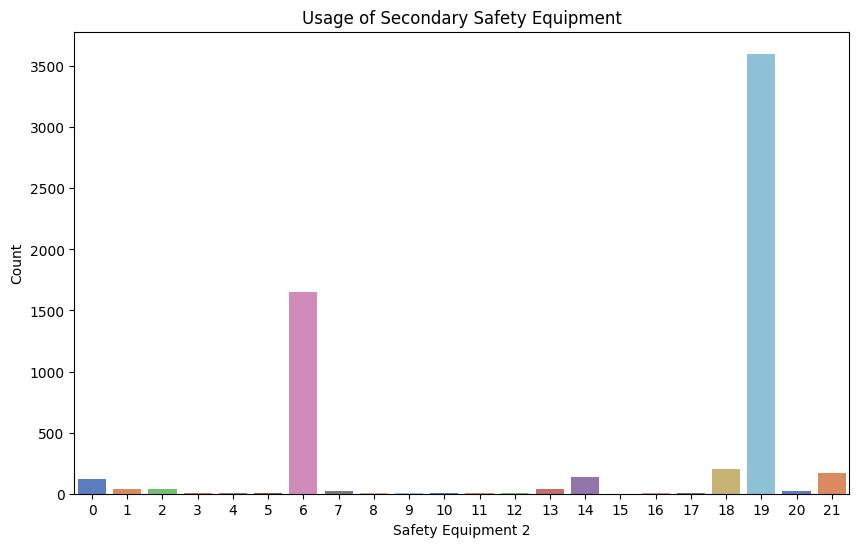

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='victim_safety_equipment_2', data=data, palette='muted')
plt.title("Usage of Secondary Safety Equipment")
plt.xlabel("Safety Equipment 2")
plt.ylabel("Count")
plt.show()



The distribution of secondary safety equipment usage demonstrates a distinct bimodal pattern, with two prominent peaks across the 21 categories. The highest frequency was observed at position 19, with approximately 3,500 cases, suggesting this type of secondary safety equipment is the most commonly implemented. A secondary peak occurred at position 6, with roughly 1,600 cases, indicating another frequently used safety measure.

Lower but notable frequencies were observed at:
- Position 1 (approximately 100 cases)
- Position 14 (approximately 200 cases)
- Position 18 (approximately 200 cases)
- Position 21 (approximately 200 cases)

The remaining positions (2-5, 7-13, 15-17, and 20) showed minimal to no usage. This highly skewed distribution pattern suggests that while there are multiple types of secondary safety equipment available, there is a clear preference for specific types, particularly those corresponding to positions 19 and 6.

The substantial gap between the highest frequency (position 19) and other positions indicates a possible standardization of certain secondary safety measures or could reflect regulatory requirements for specific types of safety equipment. This pattern of usage could have important implications for safety protocols and equipment recommendations in future safety designs.

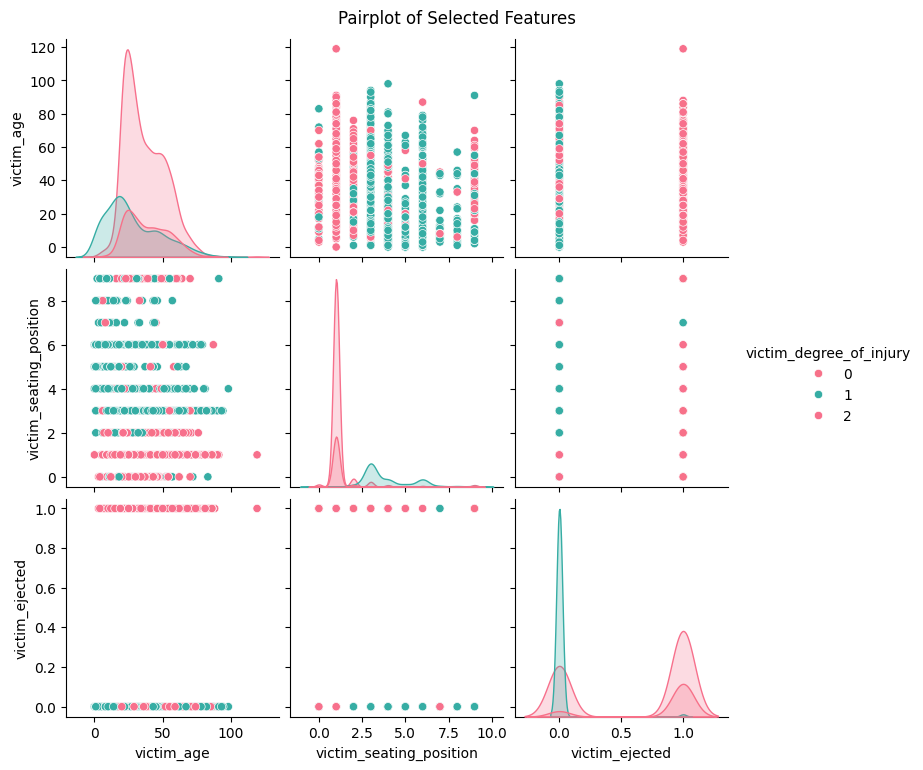

In [ ]:
# Pairplot to visualize relationships between selected features
selected_features = ['victim_age', 'victim_degree_of_injury', 'victim_seating_position', 'victim_ejected']
sns.pairplot(data[selected_features], hue='victim_degree_of_injury', palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


Analysis of the pairplot reveals several notable relationships among key variables in injury incidents. The visualization presents a matrix of relationships between victim age, victim seating position, victim ejection status, and victim degree of injury (indicated by color, where pink represents higher severity).

Key findings include:

Age Distribution:
- Victim ages show a right-skewed distribution, with a primary peak around 20-40 years
- A notable concentration of cases appears in the younger adult age range
- The distribution extends up to approximately 100 years of age

Seating Position Patterns:
- Seating positions show discrete clustering at specific positions (0-9)
- There appears to be higher frequency in certain positions, particularly positions 1 and 3
- The relationship between seating position and injury severity shows some variation across positions

Ejection Status:
- The ejection variable shows a binary distribution (0 or 1)
- There appears to be a relationship between ejection status and injury severity
- Higher severity injuries (pink dots) seem more prevalent in cases where ejection occurred

Injury Severity Relationships:
- More severe injuries (coded in pink) appear more frequently in certain combinations of age and seating position
- The ejection status shows a notable correlation with injury severity
- Age appears to have some influence on injury severity, particularly in certain ranges

These patterns suggest complex interactions between victim characteristics, seating position, and injury outcomes, with ejection status playing a particularly important role in injury severity.

## **Disscussion**

**The findings underscore the importance of consistent use of safety equipment to reduce injury severity. Age-specific safety campaigns and gender-sensitive approaches may enhance intervention effectiveness. Additionally, vehicle design improvements focusing on rear-seat safety could further mitigate risks.**

## **Recommendations**



1.   Policy Implementation: Enforce stricter regulations for seat belt usage and airbag maintenance.
2.   Public Awareness: Launch educational campaigns targeting vulnerable age groups.
3.   Vehicle Design: Enhance safety features for all seating positions, especially rear seats
4.   Research: Conduct further studies to explore additional factors such as vehicle type and accident environment.






## **Conclusion**

Safety Equipment: Effective safety equipment markedly reduces injury severity, emphasizing the importance of equipping vehicles properly and ensuring that passengers consistently utilize these features.

Age and Gender: Vulnerable age groups, particularly the very young and elderly, face a higher risk of severe injuries. While differences between genders are modest, they still suggest that targeted awareness campaigns could enhance safety for specific demographic. Seating Position: Drivers and front-seat passengers remain at higher risk due to direct impact exposure. Though rear passengers may face lower risk overall, strategies for improving rear-seat safety should not be overlooked.


This analysis highlights critical factors influencing injury severity in traffic accidents. By prioritizing safety equipment usage, addressing demographic vulnerabilities, and improving vehicle safety designs, significant strides can be made toward reducing traffic-related injuries and fatalities.





